# 2.2 Dimensionality Reduction - PCA (Principal Component Analysis)
## *Steps:*
1. Apply PCA to reduce feature dimensionality while maintaining variance.
2. Determine the optimal number of principal components using the explained variance
ratio.
3. Visualize PCA results using a scatter plot and cumulative variance plot.
## *Deliverable:*
✔️ PCA-transformed dataset
✔️ Graph showing variance retained per component

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
data = pd.read_csv('../data/clean_data.csv')
data.head(3)

age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.948726    1   1  0.757525 -0.264900    1        2  0.017197      0   
1  1.392002    1   4  1.611220  0.760415    0        2 -1.821905      1   
2  1.392002    1   4 -0.665300 -0.342283    0        2 -0.902354      1   

    oldpeak  slope   ca  thal  num  
0  1.087338      3  0.0   6.0    0  
1  0.397182      2  3.0   3.0    1  
2  1.346147      2  2.0   7.0    1

In [7]:
X = data.drop(['num'], axis=1)
y = data['num']
pca = PCA()
pca.fit(X)

PCA()

## Explained variance ratio

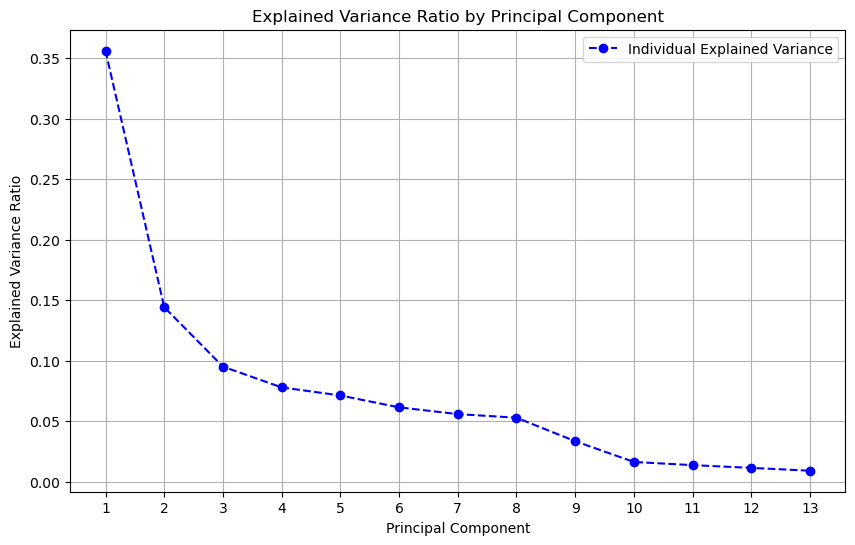

In [8]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', label='Individual Explained Variance')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.legend()

## Cumulative variance

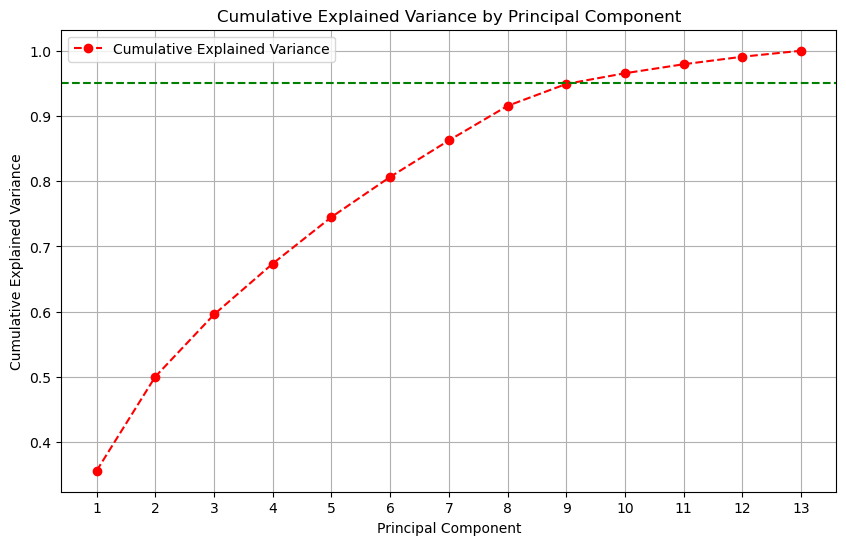

In [9]:
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='g', linestyle='--')  # threshold for 95%
plt.grid()
plt.legend()
plt.show()

- ### From the graph above the optimal number of PCA components while still retaining 95% of information is 12

In [10]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

In [11]:
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])
pca_df['num'] = data['num'].reset_index(drop=True)
pca_df.to_csv('../data/pca_transformed_data.csv', index=False)

print('PCA-transformed dataset saved as pca_transformed_data.csv')

PCA-transformed dataset saved as pca_transformed_data.csv


c:\Users\asman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\asman\AppData\Local\Temp\ipykernel_27532\2390787715.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


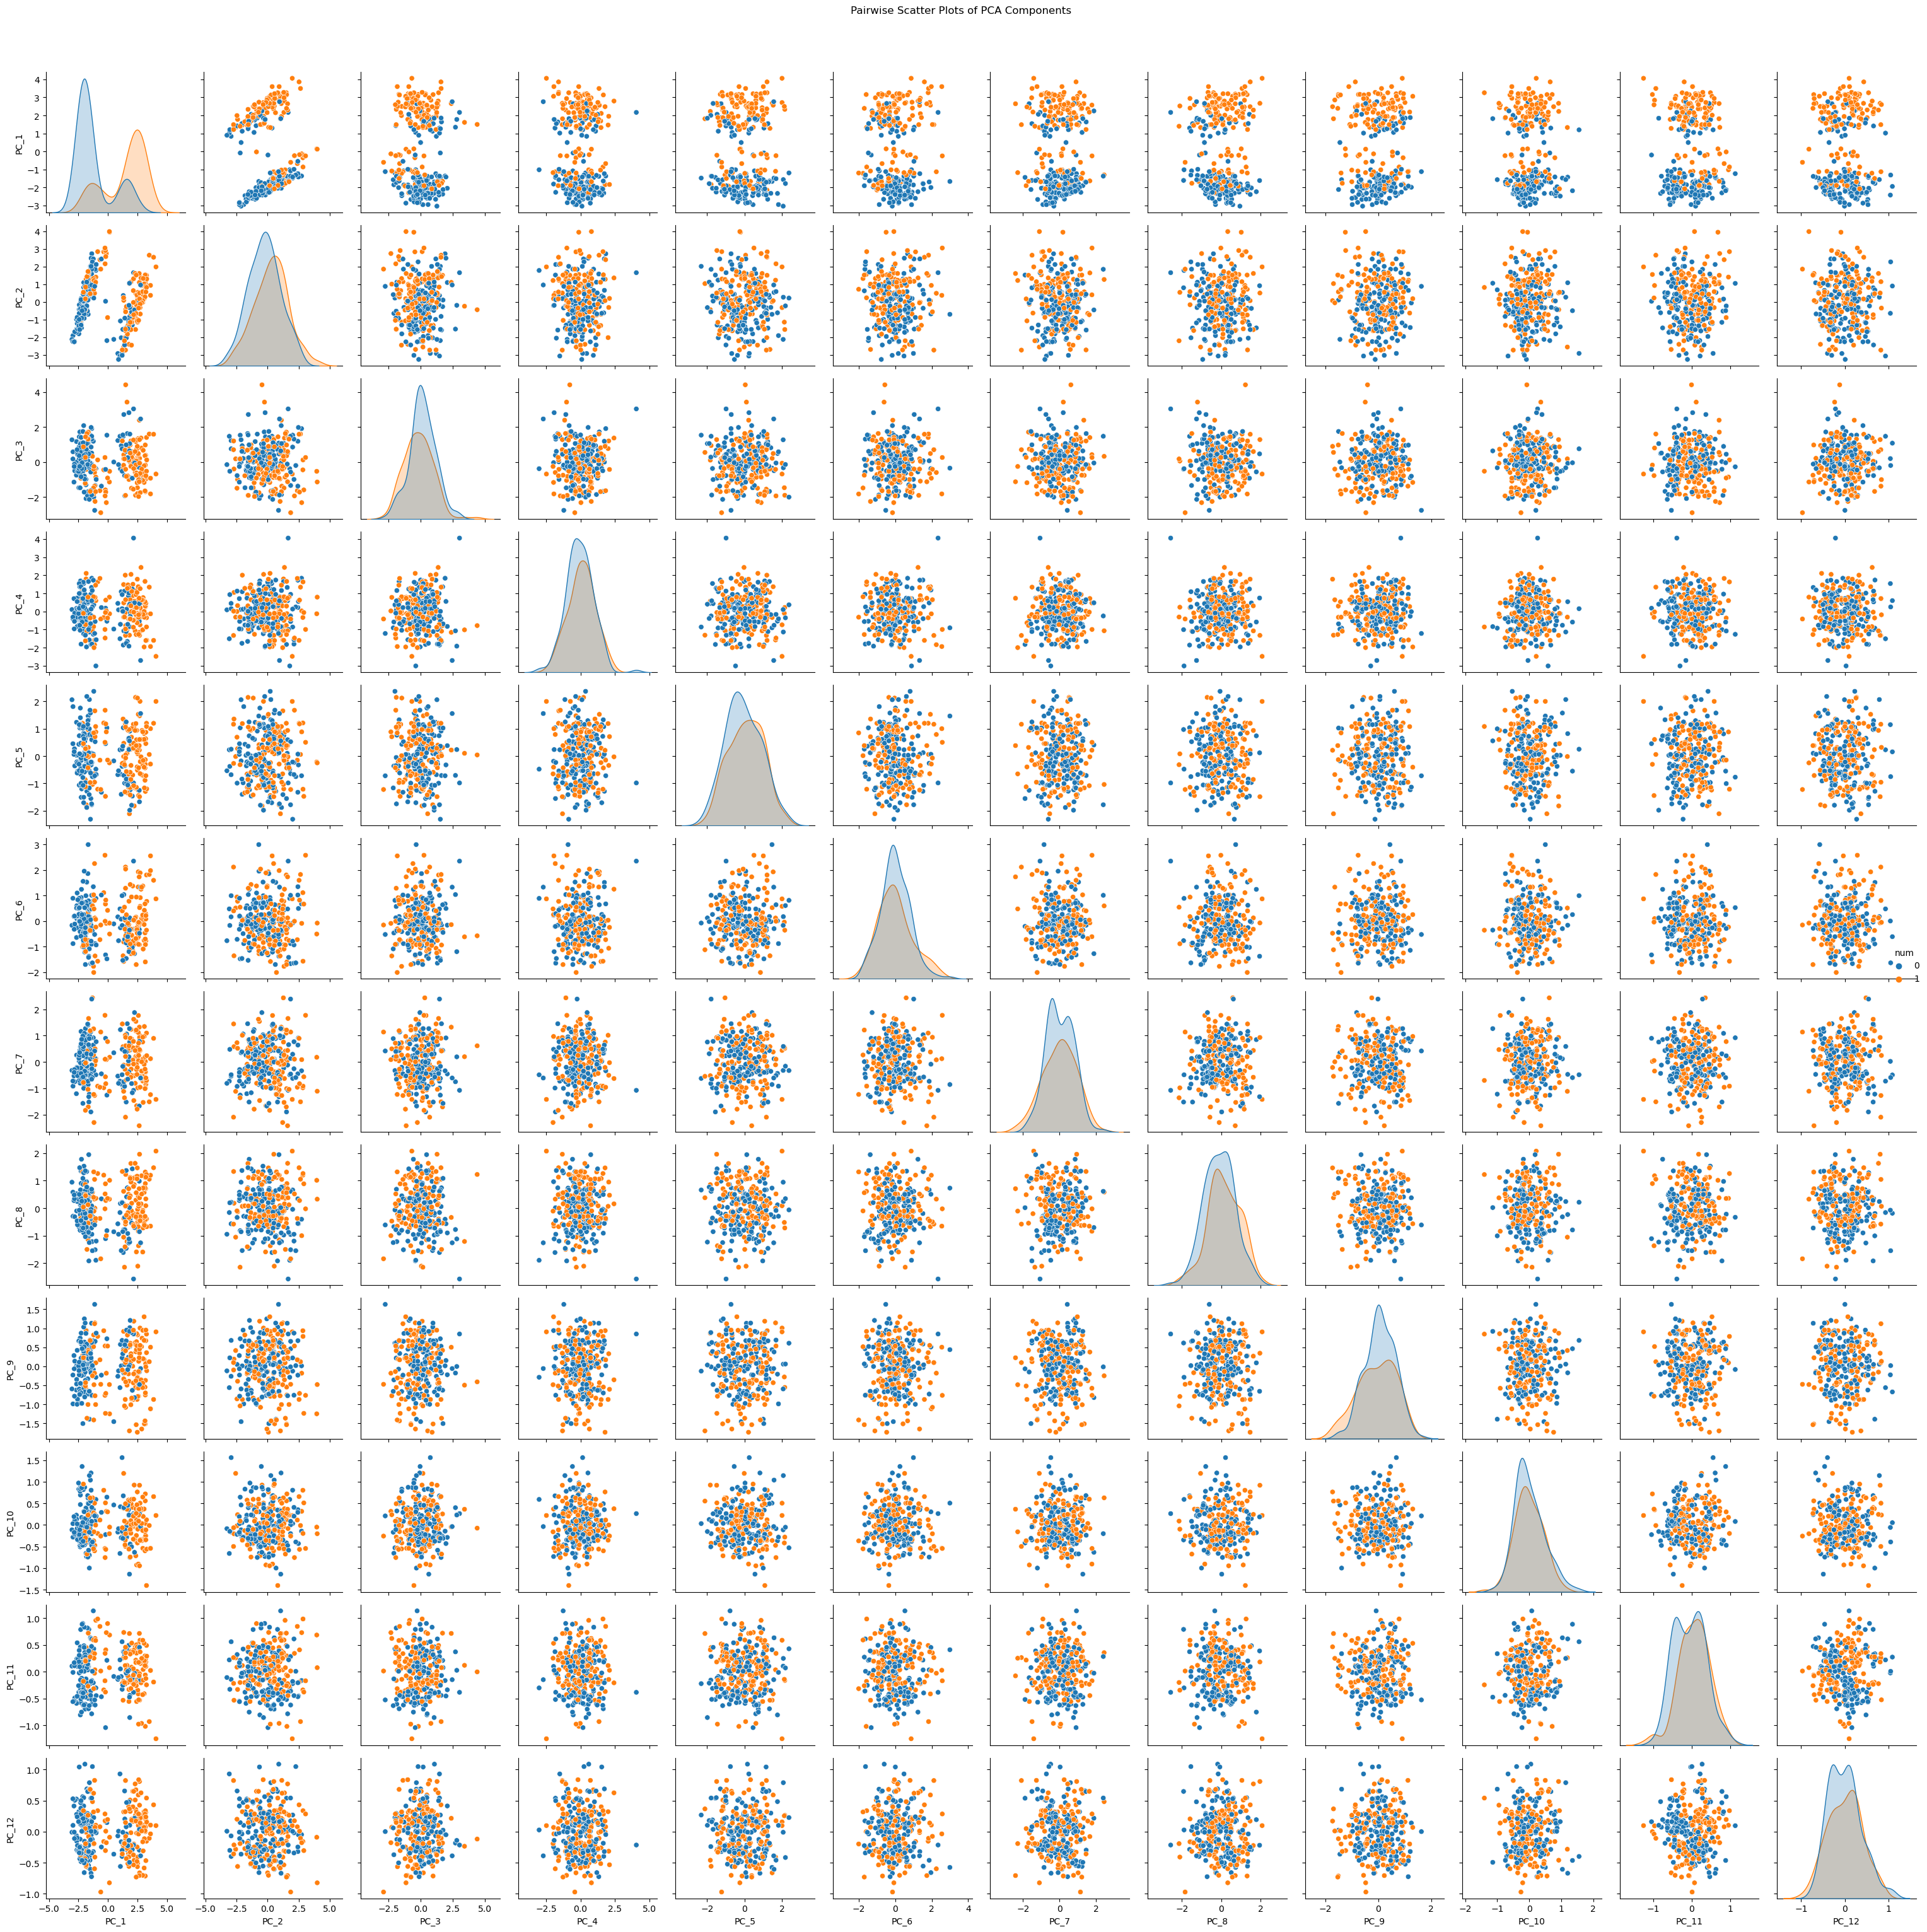

In [12]:
sns.pairplot(pca_df,hue='num')  
plt.suptitle('Pairwise Scatter Plots of PCA Components', y=1.02)
plt.tight_layout()
plt.show()

## Visulaizing PCA by Scatter plot
-  Using 2 components for the scatter plot

In [13]:
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['num'] = data['num']  

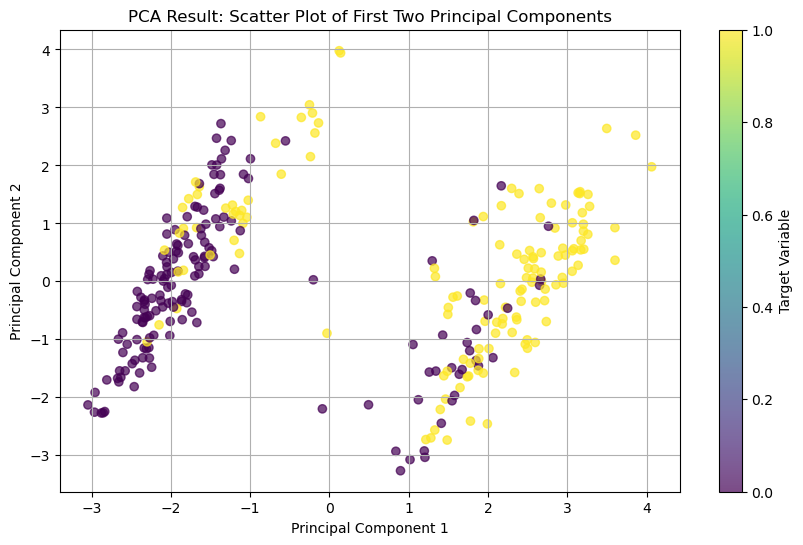

In [14]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['num'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Target Variable')
plt.title('PCA Result: Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()